# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Mutliclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

c:\Users\user\anaconda3\envs\py39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Change the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [5]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

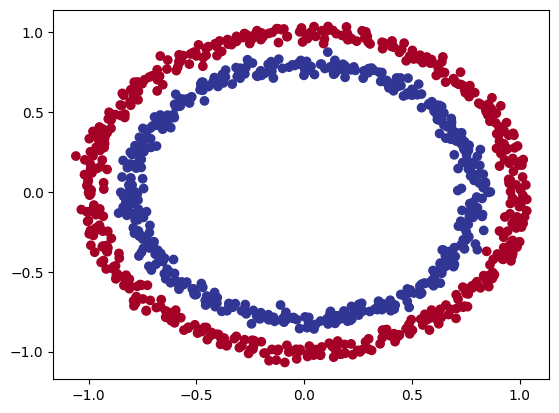

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

🛠 **Practice:** Before pushing forward, you might want to spend 10 minutes playing around with the [TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=2,2&seed=0.93799&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&batchSize_hide=true). Try adjusting the different hyperparameters you see and click play to see a neural network train. I think you'll find the data very similar to what we've just created.

## Input and output shapes

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [1]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 742us/step - loss: 7.3911 - accuracy: 0.4750
Epoch 2/5
32/32 [==============================] - 0s 613us/step - loss: 7.9483 - accuracy: 0.4800
Epoch 3/5
32/32 [==============================] - 0s 613us/step - loss: 7.9479 - accuracy: 0.4800
Epoch 4/5
32/32 [==============================] - 0s 582us/step - loss: 7.9476 - accuracy: 0.4800
Epoch 5/5
32/32 [==============================] - 0s 613us/step - loss: 7.9473 - accuracy: 0.4800


In [12]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 613us/step - loss: 7.7130 - accuracy: 0.5000


[7.713018894195557, 0.5]

Looking at the accuracy metric, our model performs poorly (50% accuracy on a binary classification problem is the equivalent of guessing), but what if we trained it for longer?

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [14]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 677us/step - loss: 0.6933 - accuracy: 0.5000


[0.6932639479637146, 0.5]

In [15]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [16]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # Add 100 dense neurons
  tf.keras.layers.Dense(10), # Add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [17]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 677us/step - loss: 0.6964 - accuracy: 0.5120


[0.6963772773742676, 0.5120000243186951]

To visulize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:
  
* Takes in a trained model, features (`X`) and labels (`y`).
* Creates a [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) of the different `X` values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).

In [18]:
import numpy as np

In [19]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  1. CS231n - https://cs231n.github.io/neural-networks-case-study/
  2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
  
  # Make predictions 
  y_pred = model.predict(x_in)
  
  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multicalss classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
    
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [20]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

313/313 [==============================] - 0s 467us/step
doing binary classification


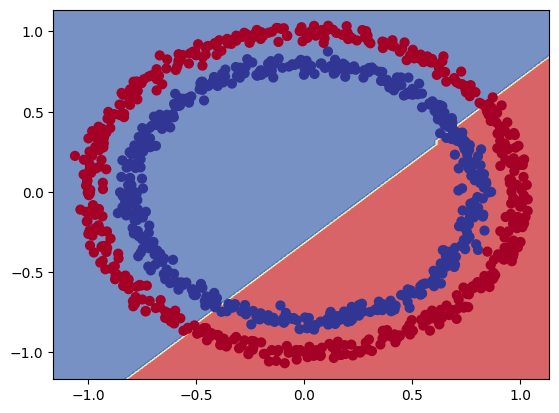

In [21]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [22]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: in user code:

    File "c:\Users\user\anaconda3\envs\py39\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\user\anaconda3\envs\py39\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\user\anaconda3\envs\py39\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\user\anaconda3\envs\py39\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\user\anaconda3\envs\py39\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\user\anaconda3\envs\py39\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


Oh wait... we compiled our model for a binary classification problem.

No trouble, we can recreate it for a regression problem.

In [23]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 495.7652 - mae: 495.7652
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 416.8714 - mae: 416.8714
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 341.3126 - mae: 341.3126
Epoch 4/100
5/5 [==============================] - 0s 1000us/step - loss: 262.8290 - mae: 262.8290
Epoch 5/100
5/5 [==============================] - 0s 999us/step - loss: 180.7591 - mae: 180.7591
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 91.2454 - mae: 91.2454
Epoch 7/100
5/5 [==============================] - 0s 1000us/step - loss: 53.0181 - mae: 53.0181
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 71.4888 - mae: 71.4888
Epoch 9/100
5/5 [==============================] - 0s 1000us/step - loss: 62.5772 - mae: 62.5772
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 44.9675 - mae: 44.9675
Epoch 11/100
5/5 [====================

2/2 [==============================] - 0s 1ms/step


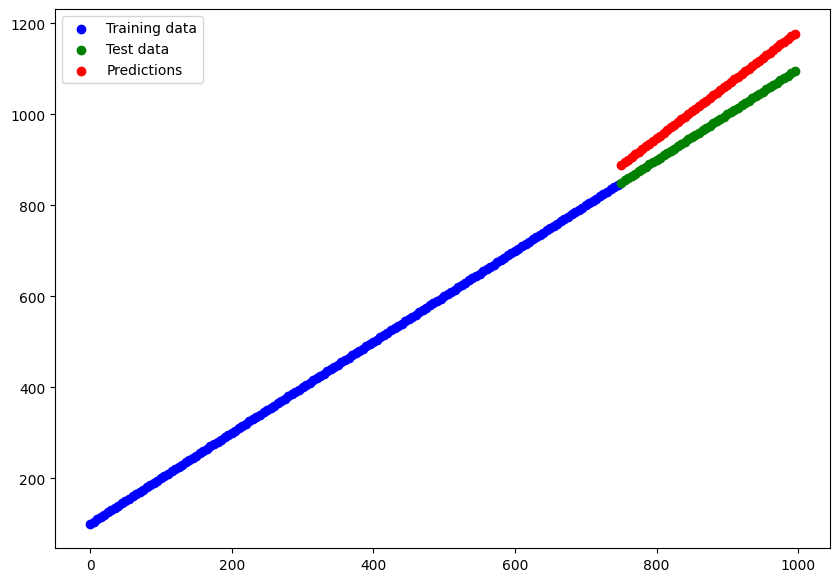

In [24]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [25]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 773us/step - loss: 6.3533 - accuracy: 0.4880
Epoch 2/100
32/32 [==============================] - 0s 645us/step - loss: 6.3404 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 710us/step - loss: 6.3379 - accuracy: 0.4890
Epoch 4/100
32/32 [==============================] - 0s 710us/step - loss: 6.3282 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 645us/step - loss: 6.3136 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 677us/step - loss: 6.3125 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 710us/step - loss: 6.3119 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 677us/step - loss: 6.3111 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 645us/step - loss: 6.3104 - accuracy: 0.4860
Epoch 10/100
32/32 [==============================] - 0s 677us/step - loss: 6.3097 - accura

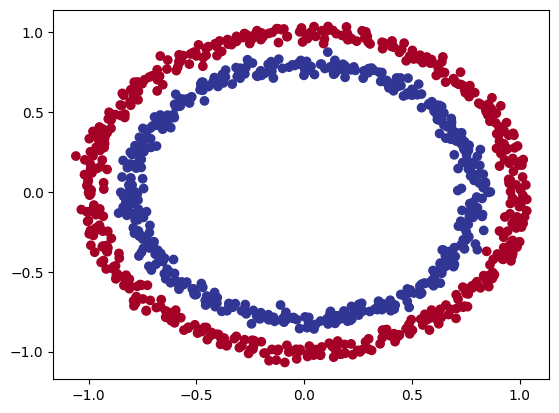

In [26]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 542us/step
doing binary classification


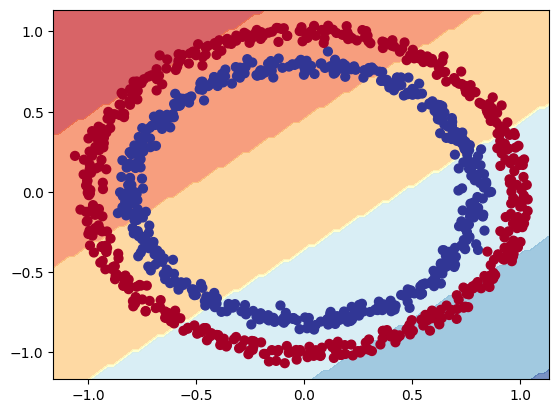

In [29]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

## Let's try build our first neural network with a non-linear activation function.

In [30]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 742us/step - loss: 4.3740 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 645us/step - loss: 4.1788 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 645us/step - loss: 3.8598 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 645us/step - loss: 3.6083 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 677us/step - loss: 3.4308 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 677us/step - loss: 3.1938 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 677us/step - loss: 2.7868 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 645us/step - loss: 1.7776 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 677us/step - loss: 1.1635 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 645us/step - loss: 1.1231 - accura

In [31]:
# Time to replicate the multi-layer neural network from TensorFlow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 871us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 774us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 677us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 742us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 742us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 806us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 742us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 710us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 742us/step - loss: 7.7125 - accuracy

In [32]:
# Evalaute the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 677us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 494us/step
doing binary classification


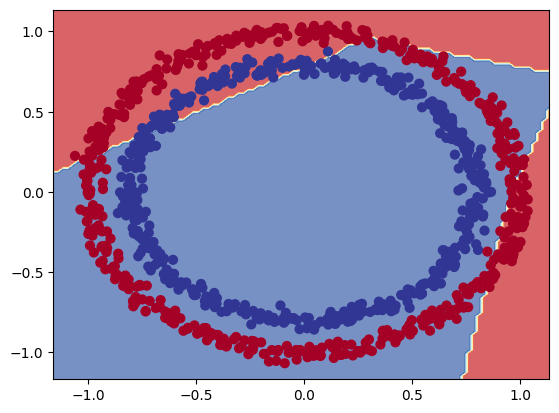

In [33]:
# How do our model predictions look?
plot_decision_boundary(model_6, X, y)

In [37]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 773us/step - loss: 0.6911 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 677us/step - loss: 0.6908 - accuracy: 0.5200
Epoch 3/100
32/32 [==============================] - 0s 677us/step - loss: 0.6905 - accuracy: 0.5180
Epoch 4/100
32/32 [==============================] - 0s 710us/step - loss: 0.6903 - accuracy: 0.5230
Epoch 5/100
32/32 [==============================] - 0s 677us/step - loss: 0.6900 - accuracy: 0.5180
Epoch 6/100
32/32 [==============================] - 0s 677us/step - loss: 0.6898 - accuracy: 0.5180
Epoch 7/100
32/32 [==============================] - 0s 710us/step - loss: 0.6895 - accuracy: 0.5240
Epoch 8/100
32/32 [==============================] - 0s 742us/step - loss: 0.6893 - accuracy: 0.5240
Epoch 9/100
32/32 [==============================] - 0s 710us/step - loss: 0.6889 - accuracy: 0.5330
Epoch 10/100
32/32 [==============================] - 0s 710us/step - loss: 0.6887 - accura

In [38]:
# 4. Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 645us/step - loss: 0.1920 - accuracy: 0.9970


[0.19196262955665588, 0.996999979019165]

313/313 [==============================] - 0s 495us/step
doing binary classification


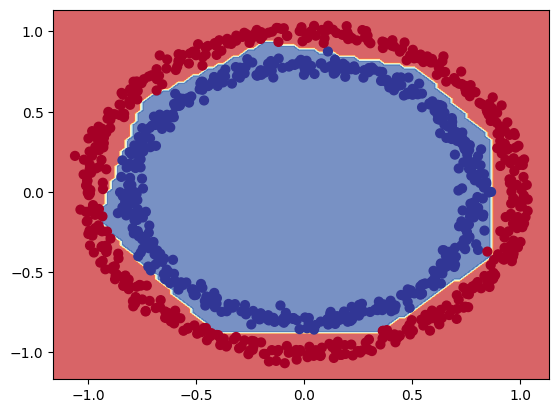

In [39]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

Nice! It looks like our model is almost perfectly (apart from a few examples) separating the two circles.

> 🤔 **Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

Before we answer that, it's important to recognize what we've just covered.

> 🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Think of it like this:

If I gave you an unlimited amount of straight lines and non-straight lines, what kind of patterns could you draw?

That's essentially what neural networks do to find patterns in data.

Now you might be thinking, "but I haven't seen a linear function or a non-linear function before..."

Oh but you have.

We've been using them the whole time.

They're what power the layers in the models we just built.

To get some intuition about the activation functions we've just used, let's create them and then try them on some toy data.

In [40]:
# Create a toy a tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

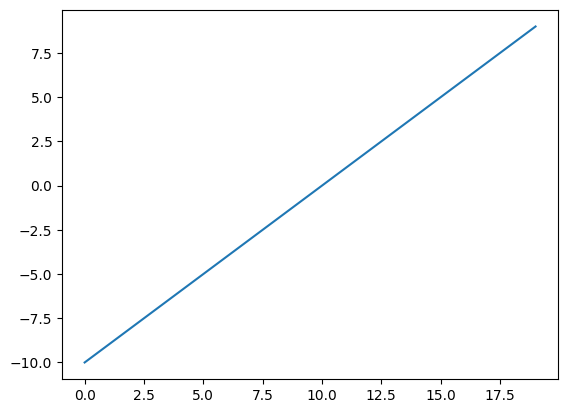

In [42]:
# Visualize our toy tensor
plt.plot(A);

In [43]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

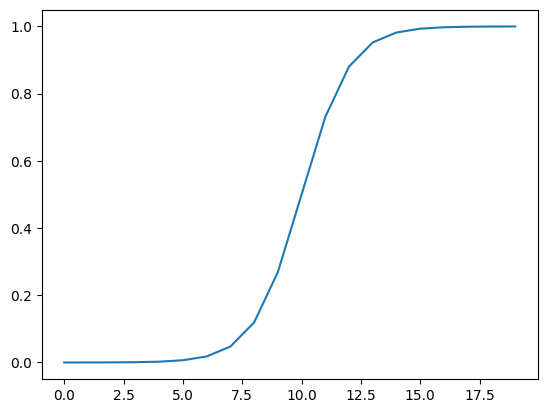

In [44]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [45]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [46]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

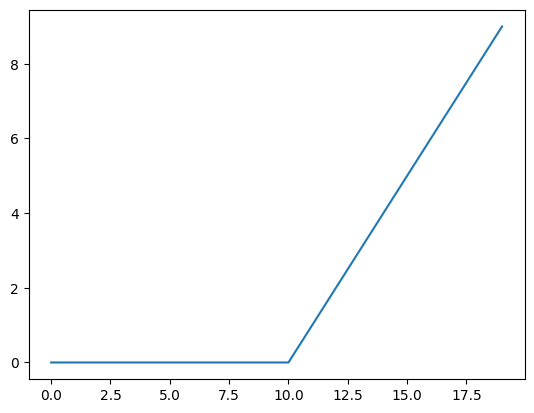

In [47]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [49]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

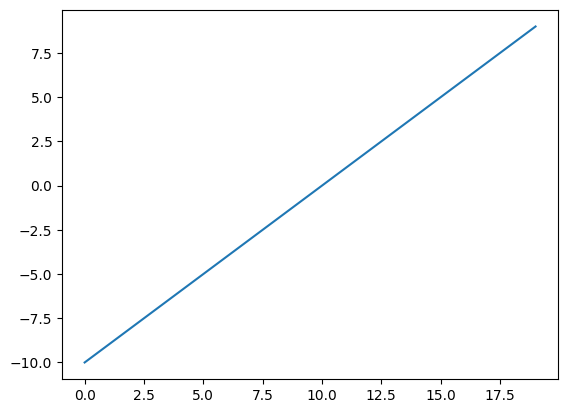

In [50]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A));

In [51]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classificiation model

If you answered the question above, you might've picked up what we've been doing wrong.

We've been evaluating our model on the same data it was trained on.

A better approach would be to split our data into training, validation (optional) and test sets.

Once we've done that, we'll train our model on the training set (let it find patterns in the data) and then see how well it learned the patterns by using it to predict values on the test set.

Let's do it.

In [53]:
# Check how many examples we have
len(X)

1000

In [57]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [70]:
# Let's recreate a model to fit on the training data and evaluate on the testing data 

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 750us/step - loss: 0.7852 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 708us/step - loss: 0.7436 - accuracy: 0.4988
Epoch 3/100
25/25 [==============================] - 0s 708us/step - loss: 0.7155 - accuracy: 0.4988
Epoch 4/100
25/25 [==============================] - 0s 667us/step - loss: 0.6978 - accuracy: 0.5025
Epoch 5/100
25/25 [==============================] - 0s 667us/step - loss: 0.6860 - accuracy: 0.5225
Epoch 6/100
25/25 [==============================] - 0s 708us/step - loss: 0.6782 - accuracy: 0.5462
Epoch 7/100
25/25 [==============================] - 0s 666us/step - loss: 0.6737 - accuracy: 0.5575
Epoch 8/100
25/25 [==============================] - 0s 708us/step - loss: 0.6705 - accuracy: 0.5663
Epoch 9/100
25/25 [==============================] - 0s 708us/step - loss: 0.6682 - accuracy: 0.5512
Epoch 10/100
25/25 [==============================] - 0s 708us/step - loss: 0.6660 - accura

In [71]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.3150 - accuracy: 0.9900


[0.31499895453453064, 0.9900000095367432]

313/313 [==============================] - 0s 494us/step
doing binary classification
313/313 [==============================] - 0s 571us/step
doing binary classification


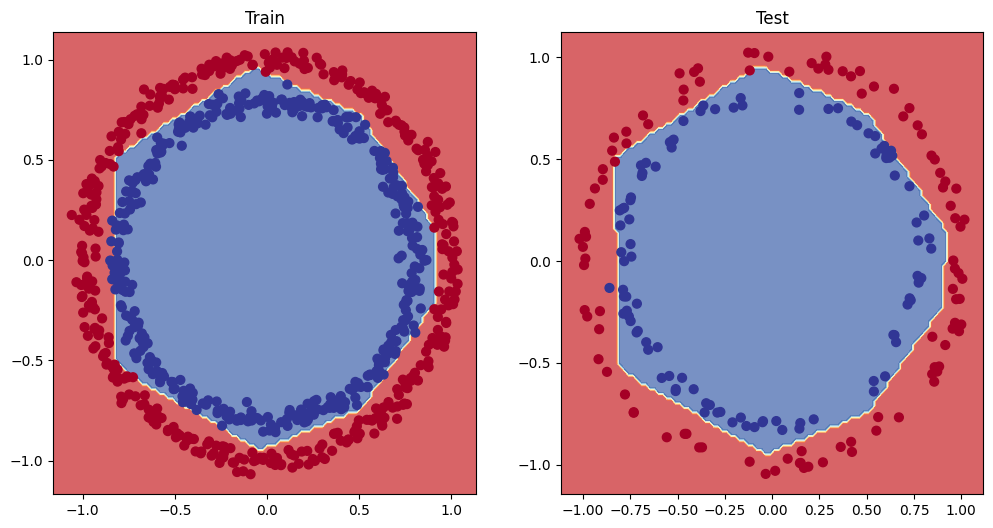

In [72]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

In [58]:
model_7.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 4)                 12        
                                                                 
 dense_24 (Dense)            (None, 4)                 20        
                                                                 
 dense_25 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Plot the loss (or training) curves

In [74]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.785236,0.49875
1,0.743563,0.49875
2,0.715496,0.49875
3,0.697760,0.50250
4,0.686000,0.52250
...,...,...
95,0.335941,0.98125
96,0.332333,0.98250
97,0.327150,0.98500
98,0.323030,0.98750


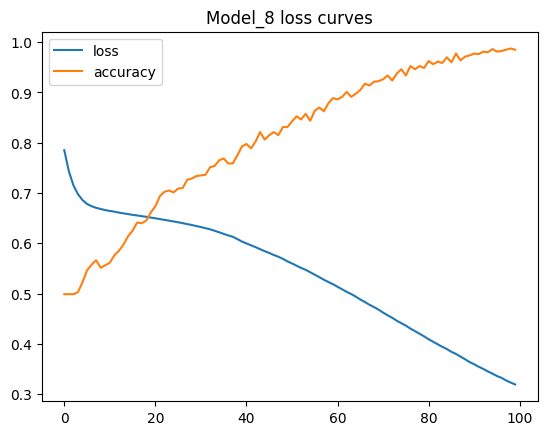

In [75]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

Beautiful. This is the ideal plot we'd be looking for when dealing with a classification problem, loss going down, accuracy going up.

> 🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

Aside from the architecture itself (the layers, number of neurons, activations, etc), the most important hyperparameter you can tune for your neural network models is the **learning rate.**

In `model_8` you saw we lowered the Adam optimizer's learning rate from the default of `0.001` (default) to `0.01`.

And you might be wondering why we did this.

Put it this way, it was a lucky guess.

I just decided to try a lower learning rate and see how the model went.

Now you might be thinking, "Seriously? You can do that?"

And the answer is yes. You can change any of the hyperparamaters of your neural networks.

With practice, you'll start to see what kind of hyperparameters work and what don't.

That's an important thing to understand about machine learning and deep learning in general. It's very experimental. You build a model and evaluate it, build a model and evaluate it.

That being said, I want to introduce you a trick which will help you find the optimal learning rate (at least to begin training with) for your models going forward.

To do so, we're going to use the following:

* A [learning rate callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler).
  * You can think of a callback as an extra piece of functionality you can add to your model while its training.
* Another model (we could use the same ones as above, we we're practicing building models here).
* A modified loss curves plot.

We'll go through each with code, then explain what's going on.

> 🔑 **Note:** The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the [Adam optimizer's](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.

In [121]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Crate a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 792us/step - loss: 0.6911 - accuracy: 0.5225 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 667us/step - loss: 0.6909 - accuracy: 0.5213 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 750us/step - loss: 0.6908 - accuracy: 0.5225 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 667us/step - loss: 0.6906 - accuracy: 0.5213 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 708us/step - loss: 0.6905 - accuracy: 0.5213 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 708us/step - loss: 0.6903 - accuracy: 0.5225 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 667us/step - loss: 0.6901 - accuracy: 0.5238 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 710us/step - loss: 0.6899 - accuracy: 0.5225 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 

<Axes: xlabel='epochs'>

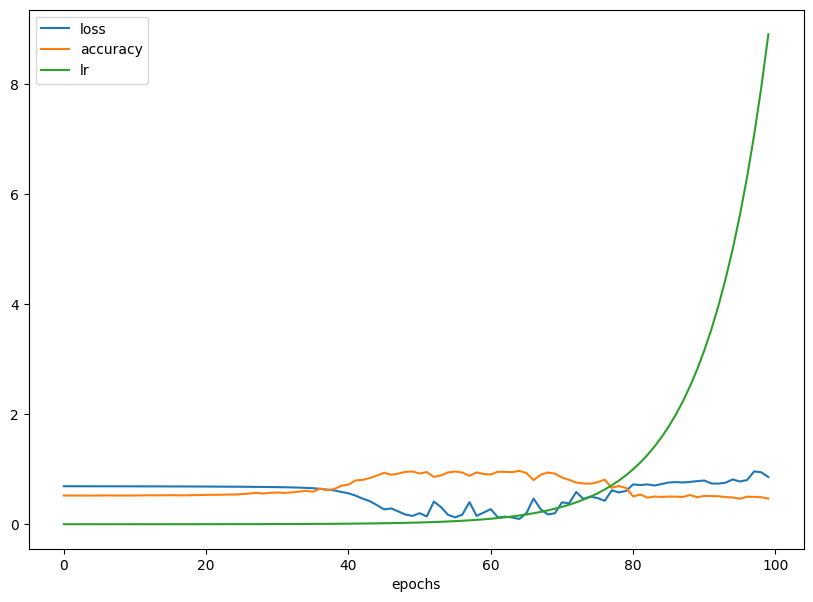

In [122]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

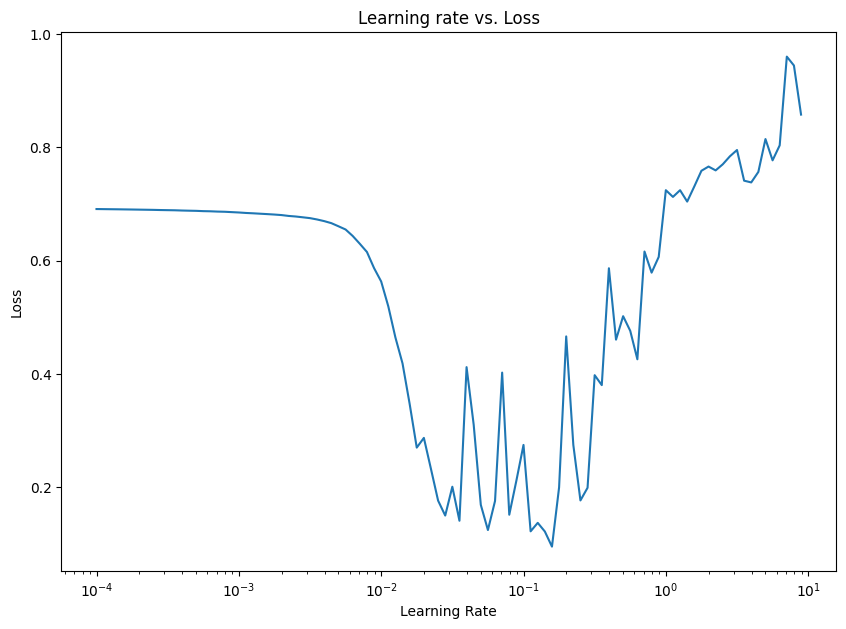

In [123]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

In [89]:
# Example of other typical learning rates values:
10**0, 10*-1, 10**-2, 10**-3, 1e-4

(1, -10, 0.01, 0.001, 0.0001)

In [110]:
# Learning rate we used before (model_8)
10**-2

0.01

In [134]:
# Let's try using a higher *ideal* learning rate with the same model

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 833us/step - loss: 0.7019 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 667us/step - loss: 0.6901 - accuracy: 0.5088
Epoch 3/100
25/25 [==============================] - 0s 708us/step - loss: 0.6833 - accuracy: 0.5238
Epoch 4/100
25/25 [==============================] - 0s 708us/step - loss: 0.6794 - accuracy: 0.5450
Epoch 5/100
25/25 [==============================] - 0s 708us/step - loss: 0.6768 - accuracy: 0.5175
Epoch 6/100
25/25 [==============================] - 0s 708us/step - loss: 0.6749 - accuracy: 0.5225
Epoch 7/100
25/25 [==============================] - 0s 667us/step - loss: 0.6734 - accuracy: 0.5300
Epoch 8/100
25/25 [==============================] - 0s 708us/step - loss: 0.6722 - accuracy: 0.5312
Epoch 9/100
25/25 [==============================] - 0s 708us/step - loss: 0.6711 - accuracy: 0.5375
Epoch 10/100
25/25 [==============================] - 0s 708us/step - loss: 0.6699 - accura

In [135]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 999us/step - loss: 0.2955 - accuracy: 1.0000


[0.295546293258667, 1.0]

In [136]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.3150 - accuracy: 0.9900


[0.31499895453453064, 0.9900000095367432]

313/313 [==============================] - 0s 580us/step
doing binary classification
313/313 [==============================] - 0s 465us/step
doing binary classification


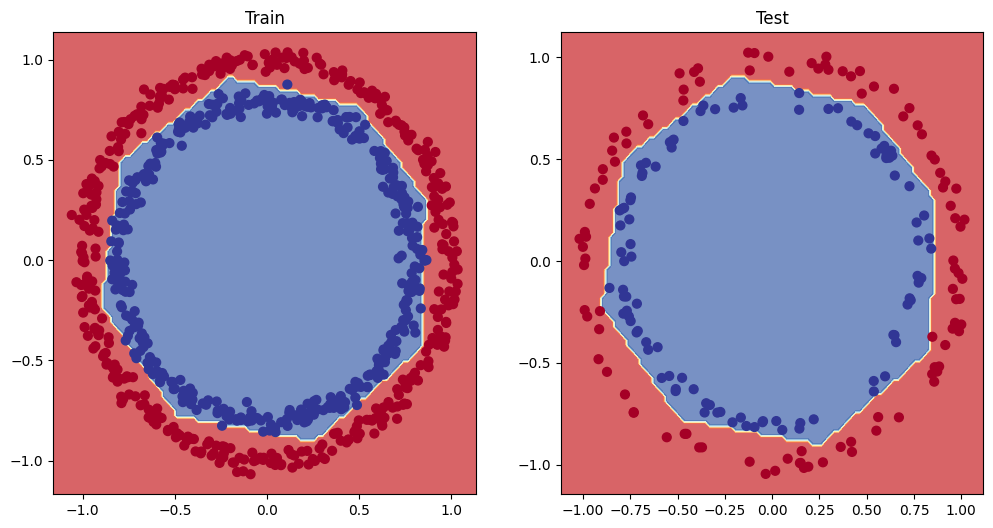

In [140]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

### More classification evaluation methods

Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

> 🔑 **Note:** Every classification problem will require different kinds of evaluation methods. But you should be familiar with at least the ones above.

Let's start with accuracy.

Because we passed `["accuracy"]` to the `metrics` parameter when we compiled our model, calling `evaluate()` on it will return the loss as well as accuracy.

In [141]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 995us/step - loss: 0.2955 - accuracy: 1.0000
Model loss on the test set: 0.295546293258667
Model accuracy on the test set: 100.00%


## How about a confusion matrix?

In [142]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 1ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [143]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [144]:
y_preds[:10]

array([[0.6731387 ],
       [0.75303763],
       [0.75303763],
       [0.66975373],
       [0.30603954],
       [0.12938629],
       [0.70062506],
       [0.19429374],
       [0.75303763],
       [0.23359326]], dtype=float32)

It looks like we need to get our predictions into the binary format (0 or 1).

But you might be wondering, what format are they currently in?

In their current format (`9.8526537e-01`), they're in a form called **prediction probabilities.**

You'll see this often with the outputs of neural networks. Often they won't be exact values but more a probability of how likely they are to be one value or another.

So one of the steps you'll often see after making predicitons with a neural network is converting the prediction probabilities into labels.

In our case, since our ground truth labels (`y_test`) are binary (0 or 1), we can convert the prediction probabilities using to their binary form using `tf.round()`.

In [145]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [147]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[101,   0],
       [  0,  99]], dtype=int64)

Alright, we can see the highest numbers are down the diagonal (from top left to bottom right) so this a good sign, but the rest of the matrix doesn't really tell us much.

How about we make a function to make our confusion matrix a little more visual?

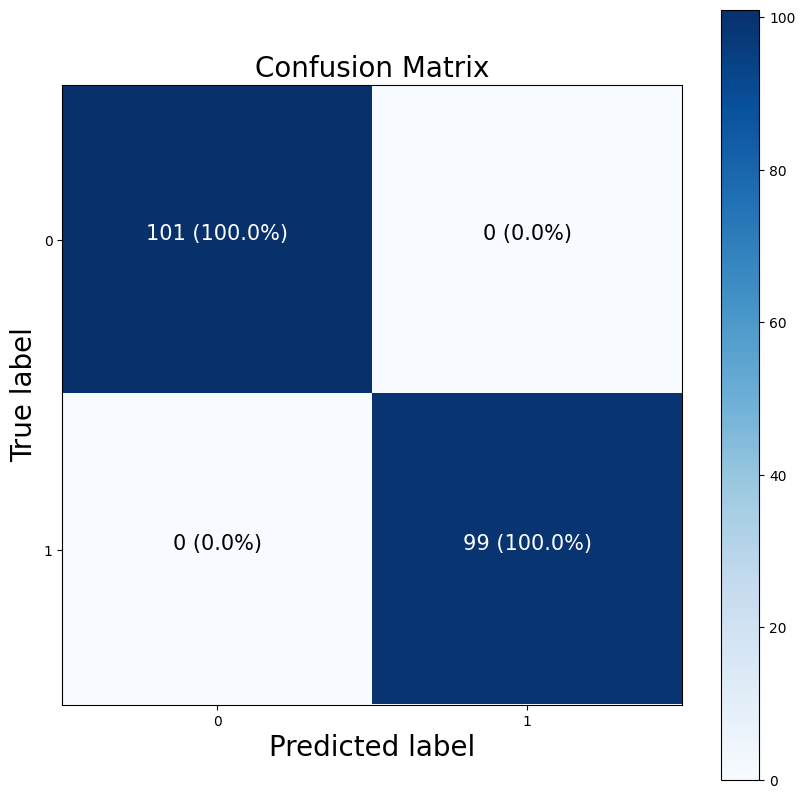

In [148]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

## Working with a larger example (milticalss classification)

We've seen a binary classification example (predicting if a data point is part of a red circle or blue circle) but what if you had multiple different classes of things?

For example, say you were a fashion company and you wanted to build a neural network to predict whether a piece of clothing was a shoe, a shirt or a jacket (3 different options).

When you have more than two classes as an option, this is known as **multiclass classification.**

The good news is, the things we've learned so far (with a few tweaks) can be applied to multiclass classification problems as well.

Let's see it in action.

To start, we'll need some data. The good thing for us is TensorFlow has a multiclass classication dataset known as [Fashion MNIST built-in](https://github.com/zalandoresearch/fashion-mnist). Meaning we can get started straight away.

We can import it using the `tf.keras.datasets` module.

> 📖 **Resource:** The following multiclass classification problem has been adapted from the [TensorFlow classification guide](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/02_neural_network_classification_in_tensorflow.ipynb). A good exercise would be to once you've gone through the following example, replicate the TensorFlow guide.

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(F"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [4]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

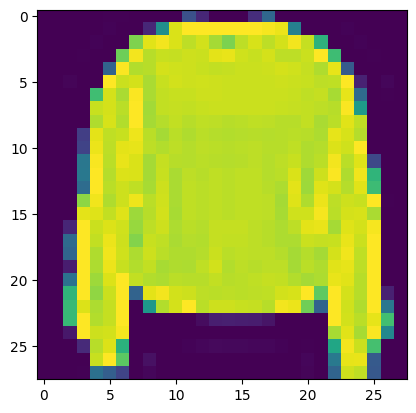

In [7]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [8]:
# Check out samples label
train_labels[7]

2

In [19]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Coat')

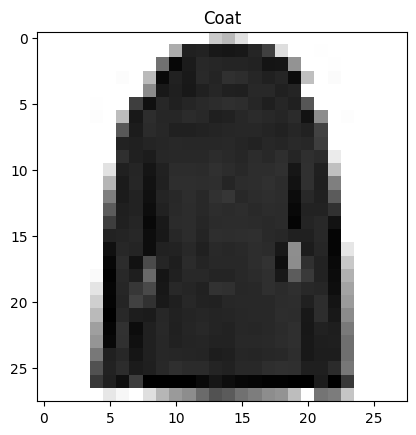

In [20]:
# Plot an example image and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

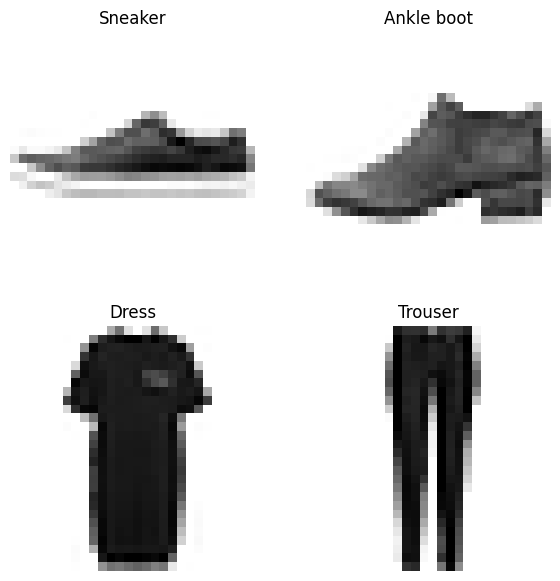

In [21]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_name[train_labels[rand_index]])
    plt.axis(False)

## Building a multi-class classification model

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

* The **input shape** will have to deal with 28x28 tensors (the height and width of our images).
    * We're actually going to squash the input into a tensor (vector) of shape `(784)`.
* The **output shape** will have to be 10 because we need our model to predict for 10 different classes.
    * We'll also change the `activation` parameter of our output layer to be `"softmax"` instead of `'sigmoid'`. As we'll see the `"softmax"` activation function outputs a series of values between 0 & 1 the same shape as **output shape**, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.
* We'll need to change our loss function from a binary loss function to a multiclass loss function.
    * More specifically, since our labels are in integer form, we'll use `tf.keras.losses.SparseCategoricalCrossentropy()`, if our labels were one-hot encoded (e.g. they looked something like *`[0, 0, 1, 0, 0...]`), we'd use `tf.keras.losses.CategoricalCrossentropy()`.
* We'll also use the `validation_data` parameter when calling the `fit()` function. This will give us an idea of how the model performs on the test set during training.

In [28]:
# our data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [29]:
28 * 28

784

In [32]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [36]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9772 - accuracy: 0.2235 - val_loss: 1.7366 - val_accuracy: 0.3059
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6854 - accuracy: 0.2847 - val_loss: 1.6506 - val_accuracy: 0.3192
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5785 - accuracy: 0.3274 - val_loss: 1.5303 - val_accuracy: 0.3482
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4756 - accuracy: 0.3702 - val_loss: 1.4274 - val_accuracy: 0.3938
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4251 - accuracy: 0.4153 - val_loss: 1.3881 - val_accuracy: 0.4354
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3946 - accuracy: 0.4306 - val_loss: 1.4034 - val_accuracy: 0.4216
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3744 - accuracy: 0.4346 - val_loss: 1.3753 - val_accuracy:

In [37]:
# Check the model summary
model_11.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 4)                 3140      
                                                                 
 dense_21 (Dense)            (None, 4)                 20        
                                                                 
 dense_22 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [39]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [45]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create a model (same as model11)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1335 - accuracy: 0.5948 - val_loss: 0.7814 - val_accuracy: 0.7346
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7010 - accuracy: 0.7557 - val_loss: 0.6755 - val_accuracy: 0.7644
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6174 - accuracy: 0.7842 - val_loss: 0.6237 - val_accuracy: 0.7757
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5788 - accuracy: 0.7976 - val_loss: 0.6004 - val_accuracy: 0.7909
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5566 - accuracy: 0.8018 - val_loss: 0.6003 - val_accuracy: 0.7979
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5413 - accuracy: 0.8087 - val_loss: 0.5838 - val_accuracy: 0.7928
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5309 - accuracy: 0.8122 - val_loss: 0.5844 - val_accuracy:

🔑 **Note:** Neural networks end to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

<Axes: title={'center': 'Noremailzed data'}>

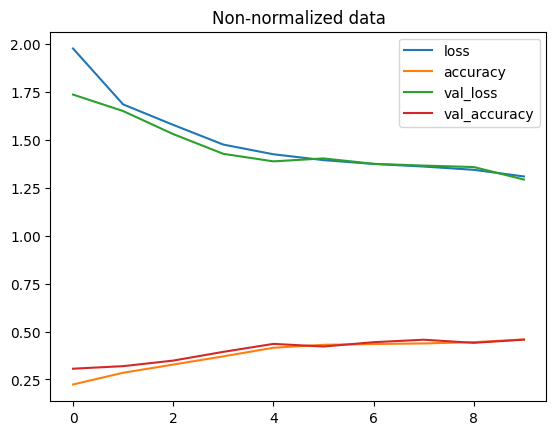

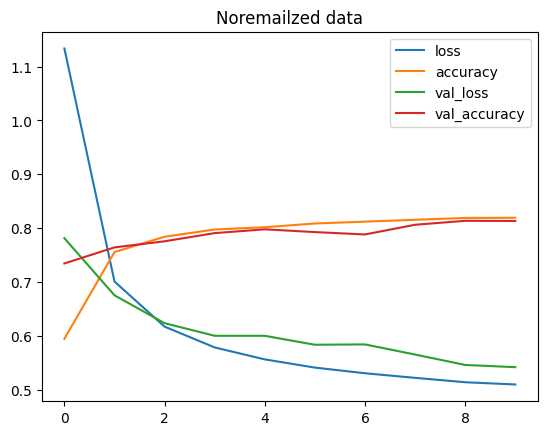

In [46]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Noremailzed data")

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [47]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3907 - accuracy: 0.4888 - val_loss: 1.0402 - val_accuracy: 0.6135 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8854 - accuracy: 0.6913 - val_loss: 0.7659 - val_accuracy: 0.7292 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6738 - accuracy: 0.7617 - val_loss: 0.6721 - val_accuracy: 0.7563 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6009 - accuracy: 0.7814 - val_loss: 0.6110 - val_accuracy: 0.7776 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5687 - accuracy: 0.7987 - val_loss: 0.5898 - val_accuracy: 0.7984 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5469 - accuracy: 0.8125 - val_loss: 0.5858 - val_accuracy: 0.8027 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

Text(0.5, 1.0, 'Finding the ideal learning rate')

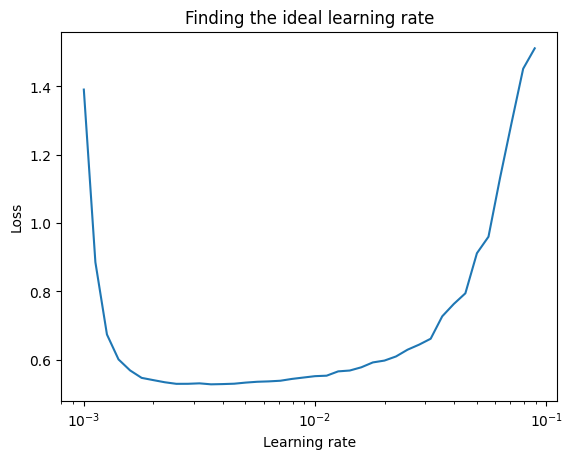

In [48]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [49]:
10**-3

0.001

In [50]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm, 
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2993 - accuracy: 0.5230 - val_loss: 0.8978 - val_accuracy: 0.6921
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7746 - accuracy: 0.7258 - val_loss: 0.7289 - val_accuracy: 0.7461
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6623 - accuracy: 0.7697 - val_loss: 0.6648 - val_accuracy: 0.7796
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6150 - accuracy: 0.7905 - val_loss: 0.6245 - val_accuracy: 0.7955
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5873 - accuracy: 0.8011 - val_loss: 0.6307 - val_accuracy: 0.7884
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5701 - accuracy: 0.8068 - val_loss: 0.6149 - val_accuracy: 0.7914
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5597 - accuracy: 0.8098 - val_loss: 0.5911 - val_accuracy:

## Evaluating our multi-class classification model

To evlauate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).
* Assess some of its predictions (through visualizations).
* Improve its accuracy (by training it for longer or changing the architecture).
* Save and export it for use in an application.

Let's go through the top 2...

In [52]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

figsize = (10, 10)

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.xaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [53]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [60]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[1.24235556e-03, 3.74361000e-04, 1.49722479e-03, 1.03722443e-03,
        3.31129791e-04, 7.04732358e-01, 6.89024280e-04, 5.37551120e-02,
        2.90382630e-03, 2.33437464e-01],
       [3.41234525e-04, 3.89238398e-11, 6.94411039e-01, 2.69744807e-04,
        1.39537841e-01, 2.81168535e-12, 1.65439382e-01, 2.36364647e-20,
        7.22667664e-07, 0.00000000e+00],
       [4.50620382e-06, 9.97577965e-01, 3.81013832e-10, 2.31012981e-03,
        7.79570655e-07, 1.95143849e-19, 3.85743775e-08, 1.51994500e-18,
        1.06592182e-04, 3.30776487e-12],
       [5.67167092e-07, 9.98080492e-01, 7.01155106e-11, 1.80319278e-03,
        1.03367199e-06, 2.40798545e-20, 7.41425943e-09, 1.69550215e-21,
        1.14640090e-04, 1.08275449e-13],
       [1.13109365e-01, 1.05601948e-05, 3.26540202e-01, 2.67027374e-02,
        3.80387716e-02, 5.76380110e-10, 4.95306969e-01, 3.68831007e-11,
        2.91344651e-04, 1.14432607e-25]], dtype=float32)

In [59]:
test_data[0], test_data_norm[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0

🔑 **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data.)

In [64]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.2423556e-03, 3.7436100e-04, 1.4972248e-03, 1.0372244e-03,
        3.3112979e-04, 7.0473236e-01, 6.8902428e-04, 5.3755112e-02,
        2.9038263e-03, 2.3343746e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=5>,
 'Sandal')

In [66]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([5, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [67]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[733,   3,  21,  80,   3,   3, 138,   5,  14,   0],
       [  4, 918,   3,  57,   4,   0,   6,   0,   6,   2],
       [ 18,   1, 710,  12, 140,  11, 101,   0,   7,   0],
       [ 31,  13,  12, 846,  40,   3,  48,   0,   6,   1],
       [  0,   0, 115,  38, 748,   2,  82,   0,  15,   0],
       [  0,   0,   1,   0,   0, 917,   0,  38,  14,  30],
       [136,   1, 129,  45, 120,   7, 526,   1,  32,   3],
       [  1,   0,   0,   0,   0,  54,   0, 900,   1,  44],
       [  3,   2,   2,   6,  14,   7,  30,   3, 932,   1],
       [  1,   0,   0,   0,   0,  47,   0,  36,   1, 915]], dtype=int64)

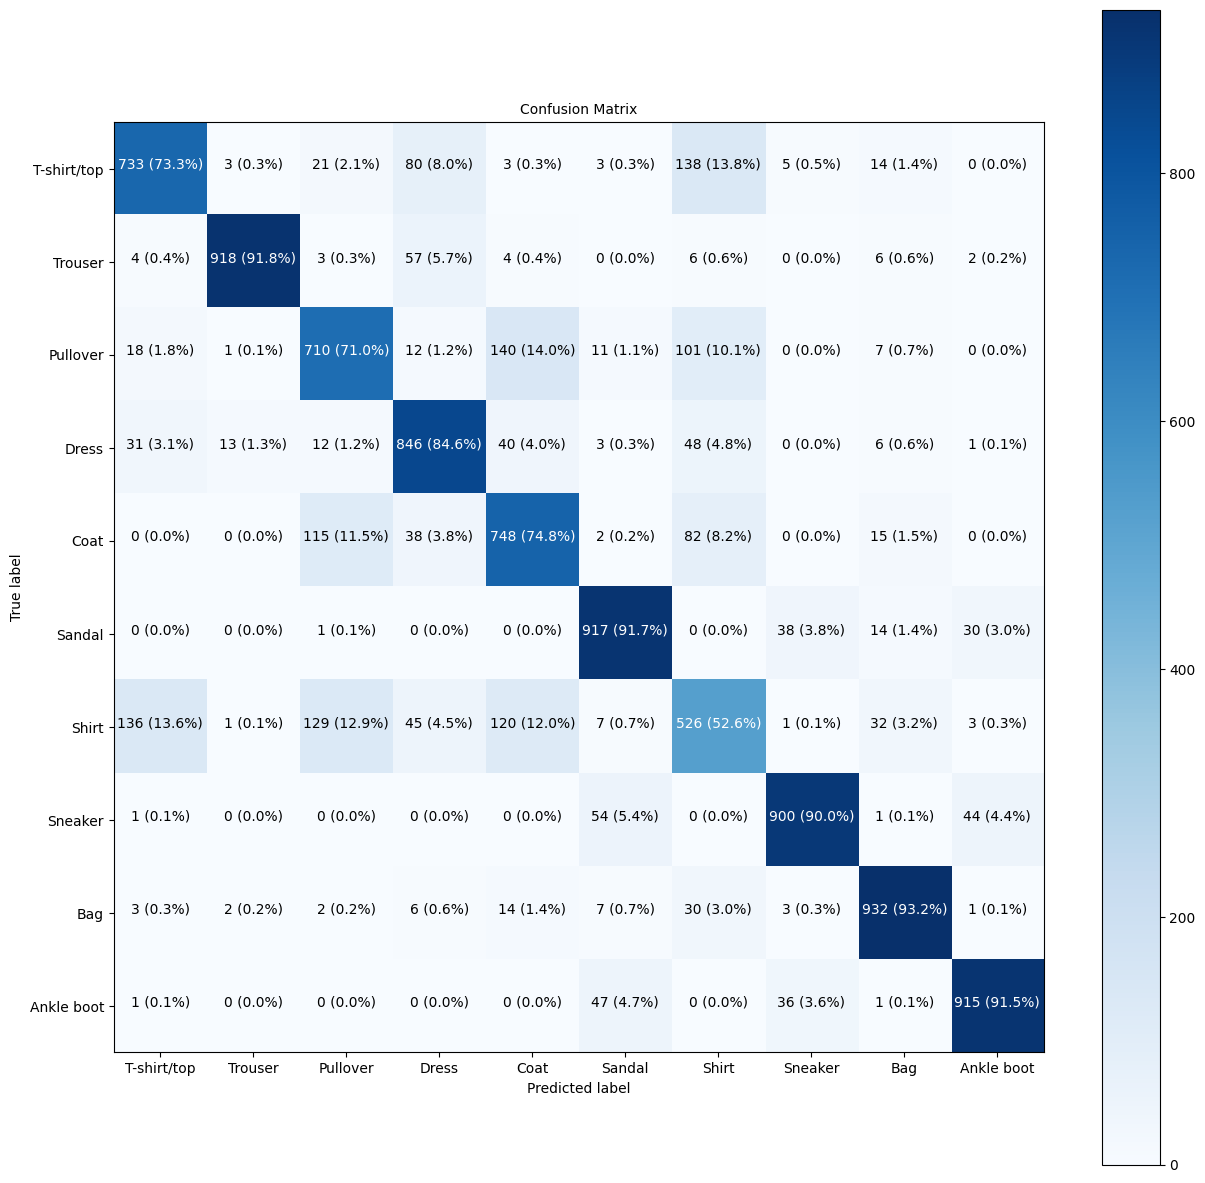

In [73]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

> 🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [74]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with a predicted and truth label.
    """
    # Set up random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_labels = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_labels:
        color = "green"
    else:
        color = 'red'

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs),
                                                     true_labels),
                                                     color=color) # set the color to green or red

1/1 [==============================] - 0s 20ms/step


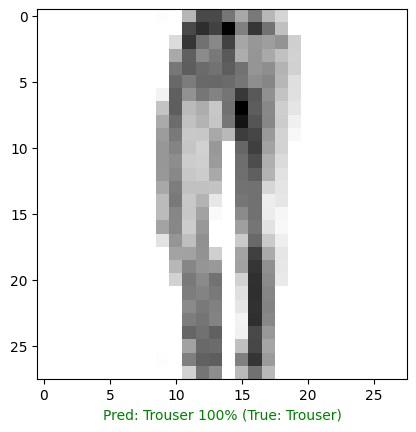

In [83]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [84]:
# Find the layers of our most recent model
model_14.layers

In [85]:
# Extract a particular layer
model_14.layers[1]

In [86]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.6659788 , -0.5341943 ,  0.4340699 , -0.07585172],
        [ 0.80013597, -0.8694306 ,  0.5743324 , -0.37943175],
        [ 1.2153918 , -0.7401294 ,  0.09156813, -0.03441608],
        ...,
        [ 0.12263703, -0.3832282 , -0.1889378 ,  0.53478974],
        [-0.21815175, -0.7962858 , -0.22885506,  0.42906228],
        [ 0.4598885 , -1.0692701 ,  0.14740045,  0.0139473 ]],
       dtype=float32),
 (784, 4))

In [87]:
28 * 28

784

In [88]:
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_41 (Dense)            (None, 4)                 3140      
                                                                 
 dense_42 (Dense)            (None, 4)                 20        
                                                                 
 dense_43 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Now let's check out the bias vector...

In [89]:
# Bias and biases shapes
biases, biases.shape

(array([1.3914963, 0.5170595, 1.3957715, 2.9714031], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get intitalized as zeros (at least in the case of a Tensorflow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [90]:
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_41 (Dense)            (None, 4)                 3140      
                                                                 
 dense_42 (Dense)            (None, 4)                 20        
                                                                 
 dense_43 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
